Head:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----- 

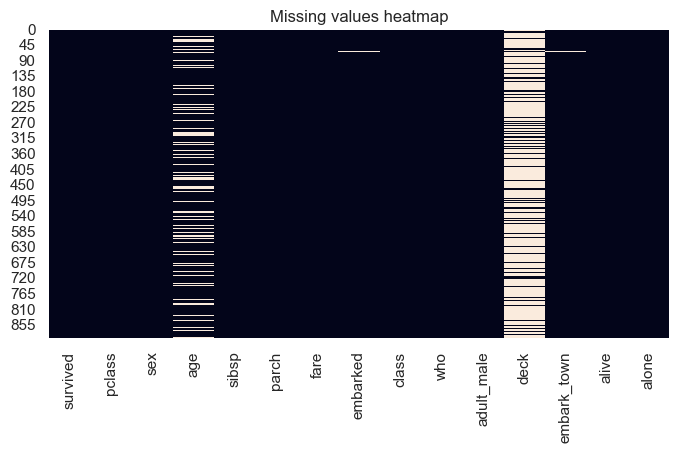

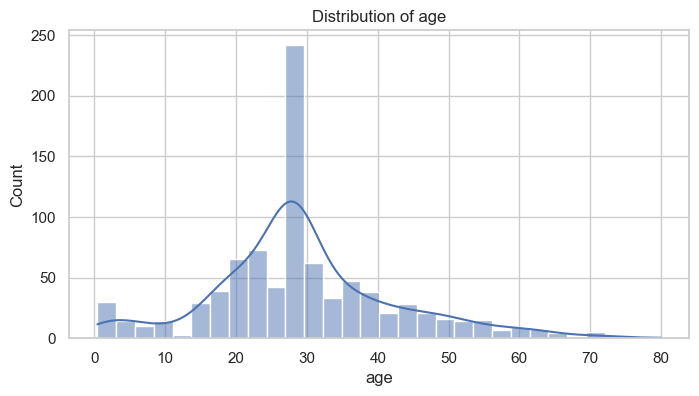

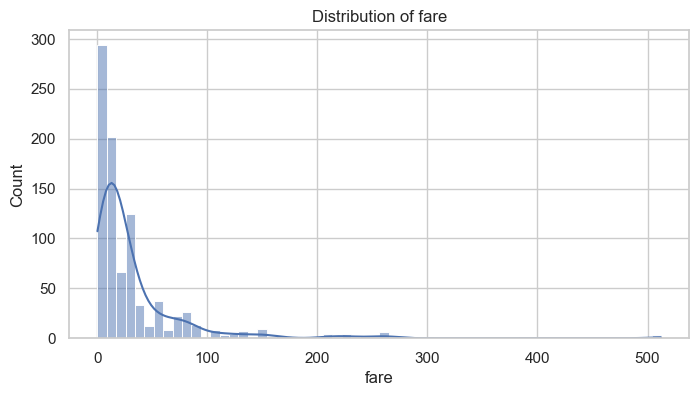

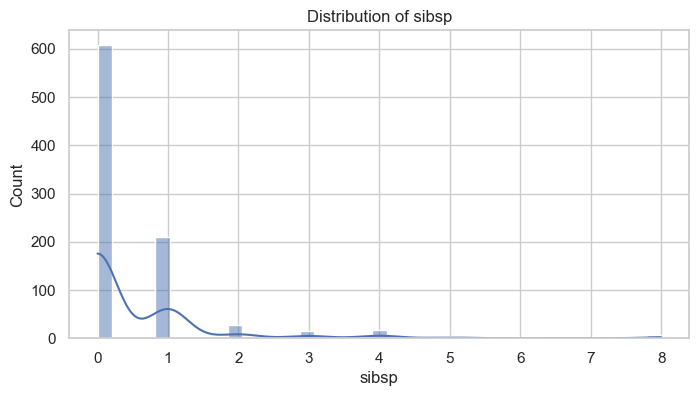

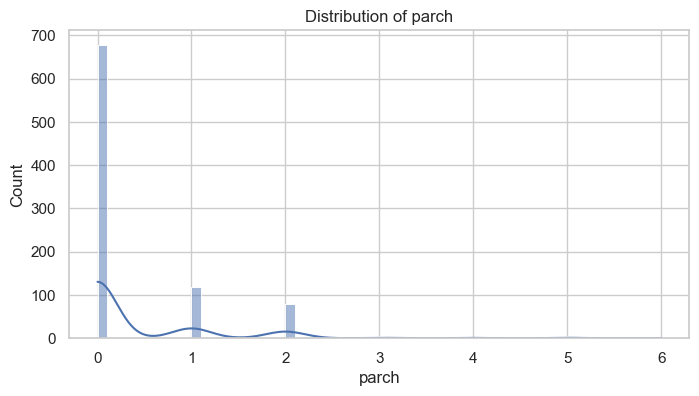

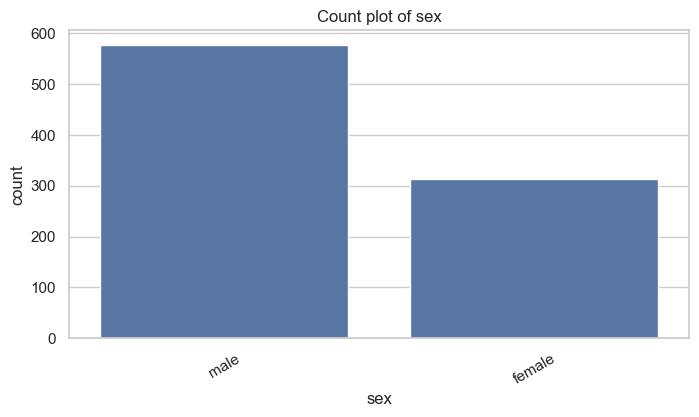

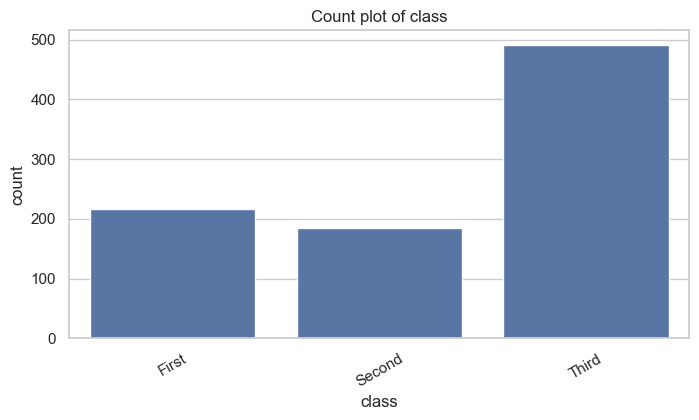

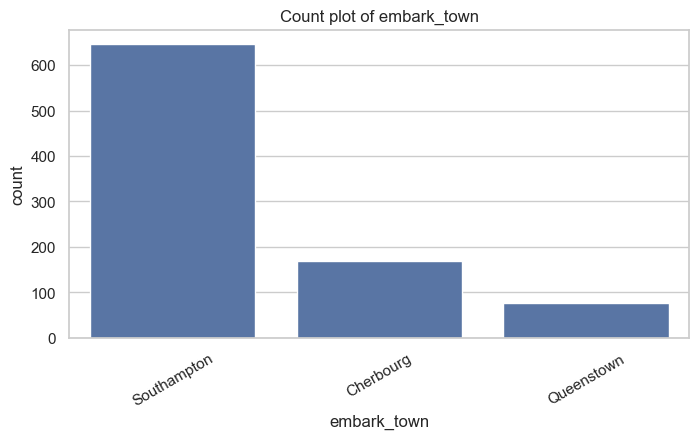

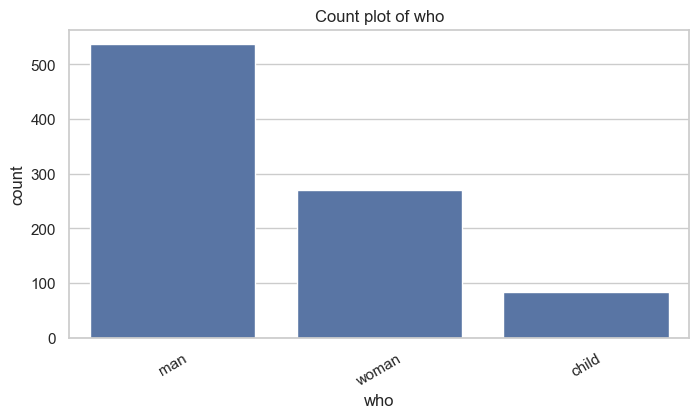

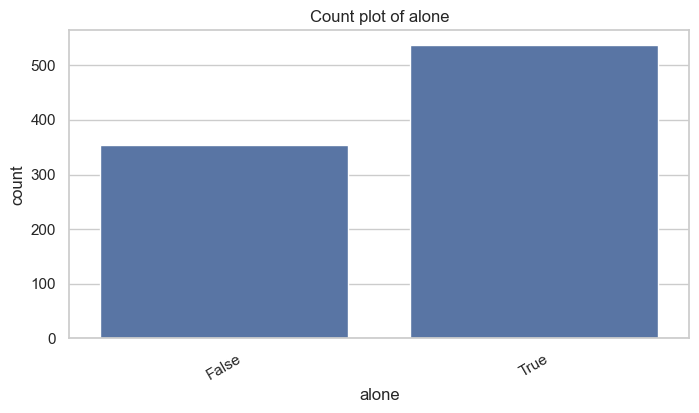

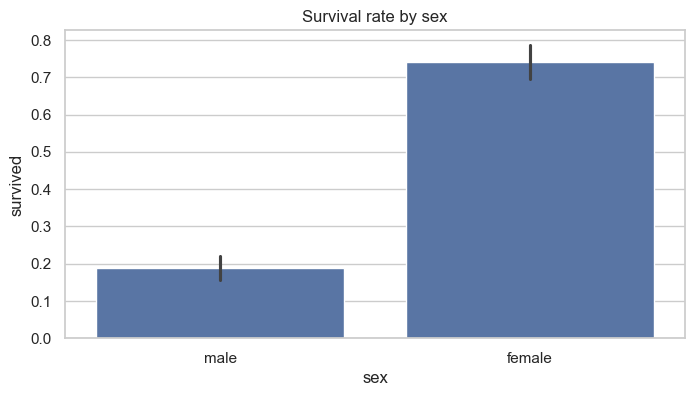

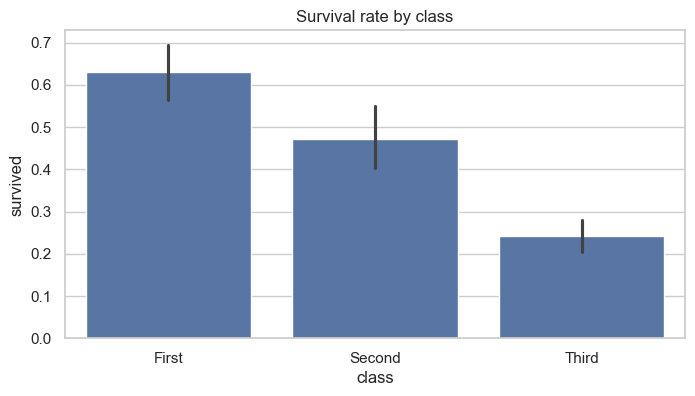

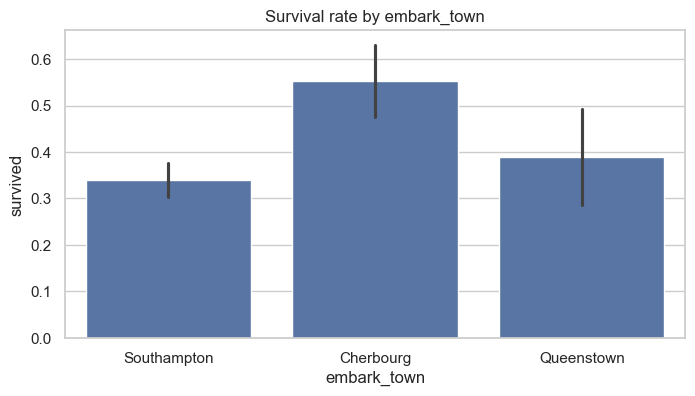

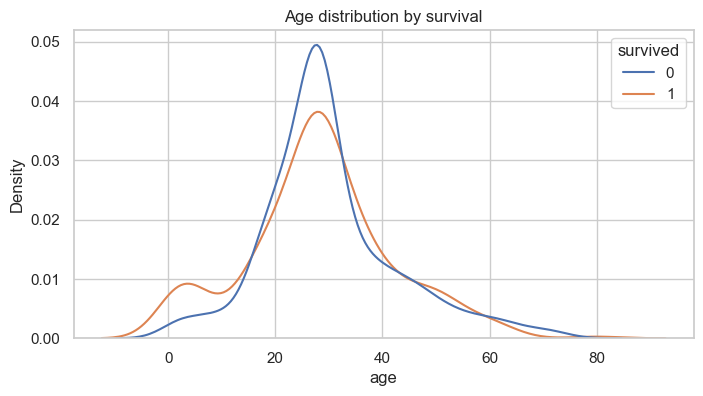

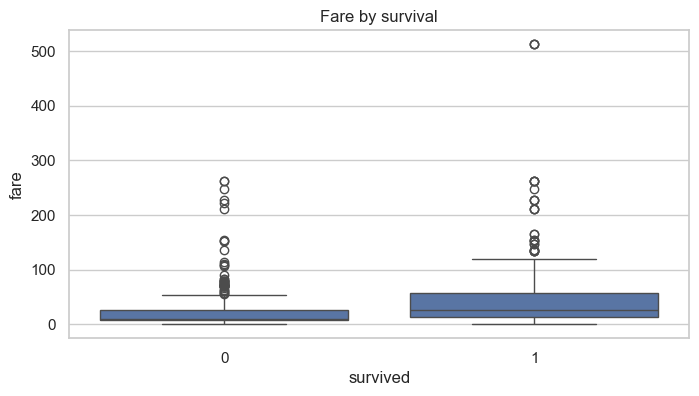

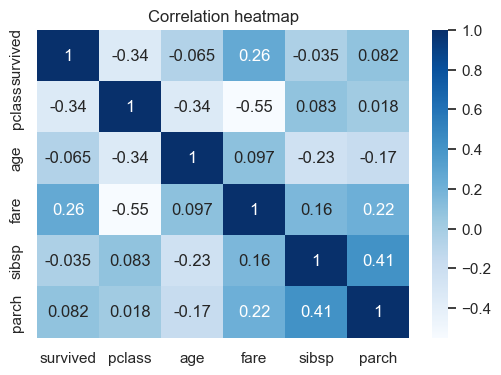

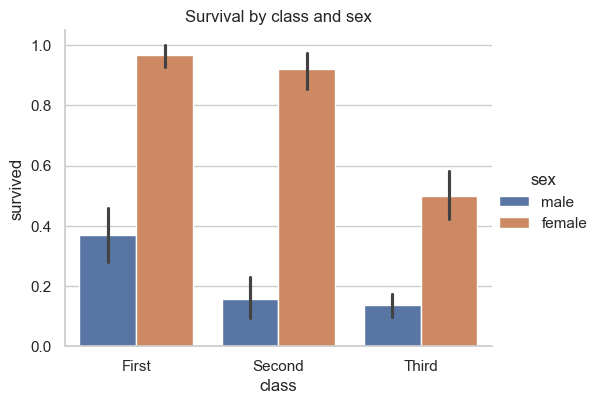

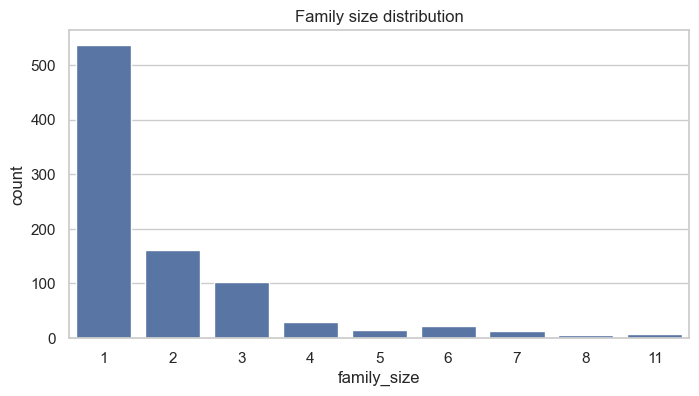

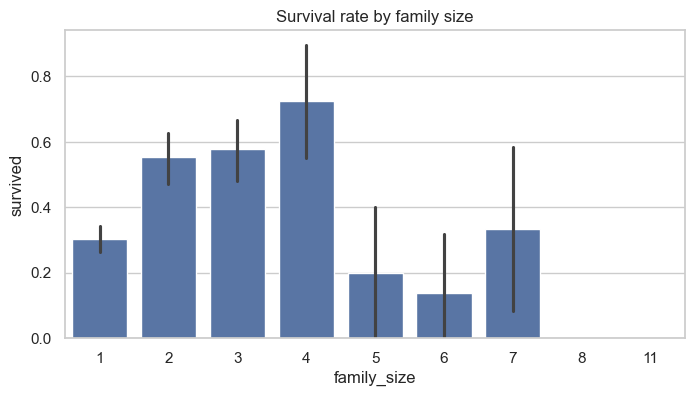

In [1]:
# =========================
# 1. Imports and settings
# =========================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# =========================
# 2. Load dataset
# =========================
df = sns.load_dataset("titanic")  # columns: survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone [web:32]

# =========================
# 3. First look
# =========================
print("Head:")
print(df.head())
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe (numeric):")
print(df.describe())
print("\nDescribe (categorical):")
print(df.describe(include="object"))

# =========================
# 4. Missing values
# =========================
print("\nMissing values per column:")
print(df.isna().sum())

plt.figure()
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing values heatmap")
plt.show()

# (Optional) simple imputation examples
df["age"] = df["age"].fillna(df["age"].median())
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

# =========================
# 5. Univariate analysis
# =========================

# 5.1 Numeric features
numeric_cols = ["age", "fare", "sibsp", "parch"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 5.2 Categorical features
cat_cols = ["sex", "class", "embark_town", "who", "alone"]

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=30)
    plt.show()

# =========================
# 6. Bivariate with target (survived)
# =========================

# 6.1 Categorical vs survived
plt.figure()
sns.barplot(data=df, x="sex", y="survived")
plt.title("Survival rate by sex")
plt.show()

plt.figure()
sns.barplot(data=df, x="class", y="survived", order=["First", "Second", "Third"])
plt.title("Survival rate by class")
plt.show()

plt.figure()
sns.barplot(data=df, x="embark_town", y="survived")
plt.title("Survival rate by embark_town")
plt.show()

# 6.2 Numeric vs survived
plt.figure()
sns.kdeplot(data=df, x="age", hue="survived", common_norm=False)
plt.title("Age distribution by survival")
plt.show()

plt.figure()
sns.boxplot(data=df, x="survived", y="fare")
plt.title("Fare by survival")
plt.show()

# =========================
# 7. Correlations / multivariate
# =========================
num_for_corr = df[["survived", "pclass", "age", "fare", "sibsp", "parch"]]

plt.figure(figsize=(6, 4))
sns.heatmap(num_for_corr.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap")
plt.show()

sns.catplot(
    data=df, x="class", y="survived", hue="sex",
    kind="bar", height=4, aspect=1.3
)
plt.title("Survival by class and sex")
plt.show()

# =========================
# 8. Simple feature engineering
# =========================
df["family_size"] = df["sibsp"] + df["parch"] + 1

plt.figure()
sns.countplot(data=df, x="family_size")
plt.title("Family size distribution")
plt.show()

plt.figure()
sns.barplot(data=df, x="family_size", y="survived")
plt.title("Survival rate by family size")
plt.show()
